## 한글 폰트 설치

In [1]:
# 한글 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

# 런타임>세션 다시 시작 클릭 후 코드 실행

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 35 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (12.4 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 126281 files and direc

# 6차시: 다변수 시각화 (Multivariate Visualization)
이번 시간에는 두 개 이상의 변수 간의 관계를 시각적으로 탐색합니다.

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 설정
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

df = pd.read_csv('온라인쇼핑몰_주문데이터.csv')

## 수치형 변수 간 관계:scatterplot
- **정의**  
  두 연속형 변수 간의 관계를 시각적으로 표현하는 그래프.  
  각 점은 하나의 **관측치**를 의미함.

- **용도**
  - 변수 간 **상관관계** 탐색 (양의 관계, 음의 관계, 무관)
  - **패턴/추세** 확인 (선형, 비선형 등)
  - **이상치(outlier)** 식별
  - 군집(클러스터) 여부 탐색

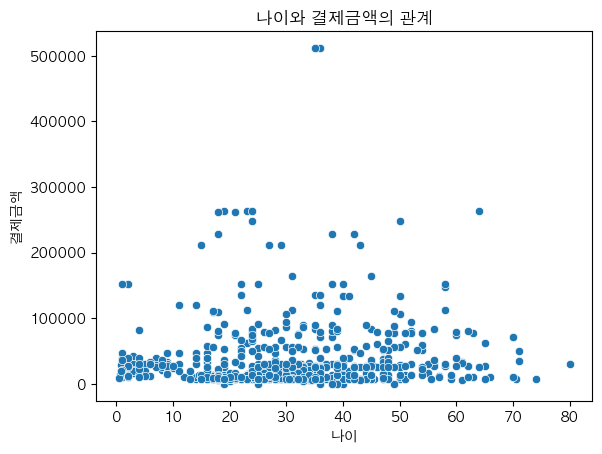

In [4]:
sns.scatterplot(x='나이', y='결제금액', data=df)
plt.title('나이와 결제금액의 관계')
plt.show()

## 수치형 변수 간 상관관계 (heatmap)
- 히트맵은 **변수 간 관계(보통 상관관계)**를 색상으로 시각화한 그래프이다.
- **상관계수(Correlation Coefficient)**  
  - +1: 강한 양의 상관  
  - -1: 강한 음의 상관  
  - 0: 거의 무관한 관계
- **색상 해석 (예: cmap='coolwarm')**  
  - 파란색: 음의 상관관계  
  - 빨간색: 양의 상관관계  
  - 색이 진할수록 관계 강도가 큼
- **대각선 값은 항상 1** → 자기 자신과의 상관관계
- 타깃 변수와 높은 상관을 갖는 입력 변수 중심으로 분석
- 입력 변수 간 상관이 너무 높다면 → **중복 제거 또는 차원 축소 필요**
- 히트맵은 **선형관계**만 반영하며 **이상치·결측치에 민감**


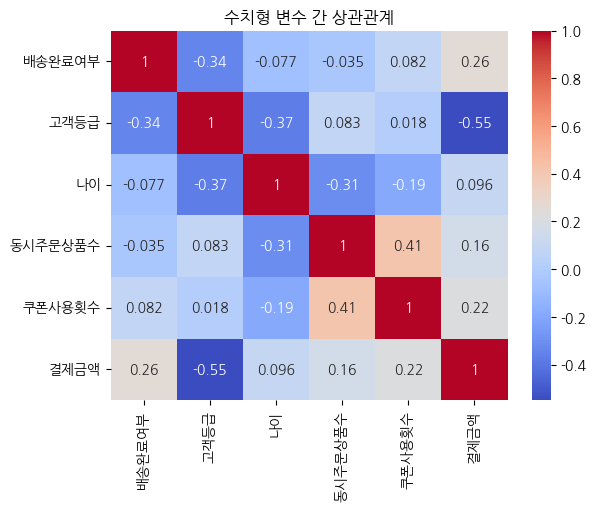

In [ ]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm') #numeric_only=수치형 변수만, annotation=상관계수 표현,colormap=음양 확인
plt.title('수치형 변수 간 상관관계')
plt.show()

## 범주형-수치형 관계 (박스플롯)
- Boxplot(박스플롯)은 데이터의 **분포와 이상치(outlier)**를 시각적으로 요약해서 보여주는 그래프

- 구성요소
    - 중앙값 (Median): 박스 안의 가로선 → 데이터의 중앙값 (50% 위치)
    - 1사분위수(Q1): 박스의 아래쪽 경계 → 하위 25%
    - 3사분위수(Q3): 박스의 위쪽 경계 → 상위 25%
    - IQR (Interquartile Range): Q3 - Q1 → 박스의 길이
    - 이상치 (Outliers): 수염 바깥에 위치한 데이터 → 점으로 표시됨
- 해석 포인트
    - 박스가 짧을수록 분포가 밀집
    - 박스의 위치가 위쪽이면 값이 전반적으로 큼
    - 수염이 비대칭이면 데이터가 치우침(Skewed)
    - 점이 많을수록 이상치가 많은 데이터




<img src='https://builtin.com/sites/www.builtin.com/files/styles/ckeditor_optimize/public/inline-images/1_boxplots.jpg'>

<Axes: ylabel='결제금액'>

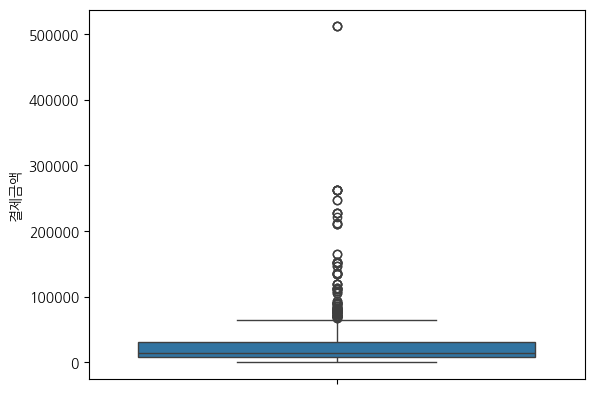

In [ ]:
sns.boxplot(y='결제금액', data=df)

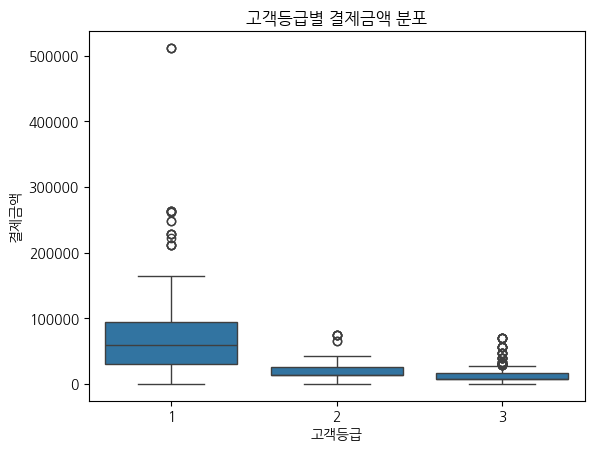

In [ ]:
sns.boxplot(x='고객등급', y='결제금액', data=df)
plt.title('고객등급별 결제금액 분포')
plt.show()

---

## 연습 문제

### 문제 1: 아래 가이드를 따라 코드를 작성하고, 질문에 대해 답하시오.
- 차트 종류: `sns.boxplot`
- x축: `성별`
- y축: `결제금액`
- 데이터프레임 변수명: `df`
- 그래프 제목: `'성별에 따른 결제금액 분포'`

다음 보기 중 그래프에 대한 해석으로 틀린 것을 하나 고르고, `답안01`에 저장하시오.
(예: 답안01 = 2)

1. 남성보다 여성의 결제금액 중앙값이 더 높다.
2. 남성과 여성 모두 결제금액의 이상치가 존재한다.
3. 여성의 결제금액 분포가 남성보다 더 넓다.
4. 박스플롯의 중앙선은 평균값을 의미한다.

Text(0.5, 1.0, '성별에 따른 결제금액 분포')

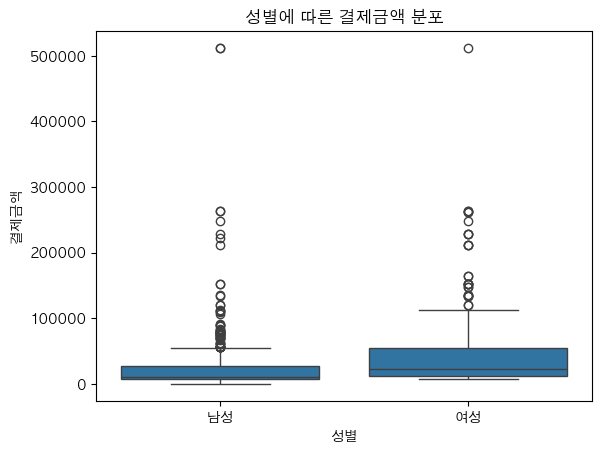

In [6]:
# 여기에 코드를 작성하세요.
sns.boxplot(x='성별',y='결제금액',data=df)
plt.title('성별에 따른 결제금액 분포')

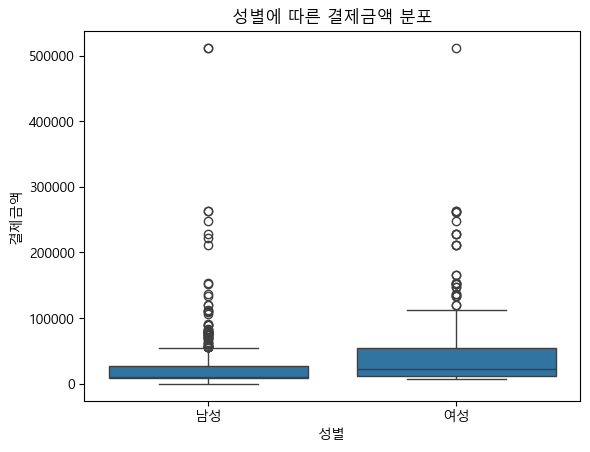

In [ ]:
# 정답 코드
sns.boxplot(x='성별', y='결제금액', data=df)
plt.title('성별에 따른 결제금액 분포')
plt.show()

답안01=4

---

## 도전 문제


### 문제 2.아래 조건에 맞는 **막대 그래프(barplot)**를 작성하세요.

- 사용 함수: `sns.barplot`
- x축: `'고객등급'`
- y축: `'결제금액'`
- 그룹 구분(hue): `'배송완료여부'`
- 그래프 제목: `'배송완료여부에 따른 고객등급별 결제금액'`
- 데이터프레임 변수명: `df`

다음 보기 중 **그래프 해석으로 틀린 것**을 하나 고르세요.  
(예: `답안 = 3`)

- 1. 1 등급 고객은 배송이 완료된 경우 결제금액이 가장 높다.  
- 2. 2 등급 고객의 경우 배송완료된 고객들이 미완료 고객보다 평균 결제금액이 높다.  
- 3. 3 등급 고객은 배송완료 여부와 관계없이 결제금액이 거의 같다.  
- 4. 그래프는 각 그룹의 총합 결제금액을 나타낸다.


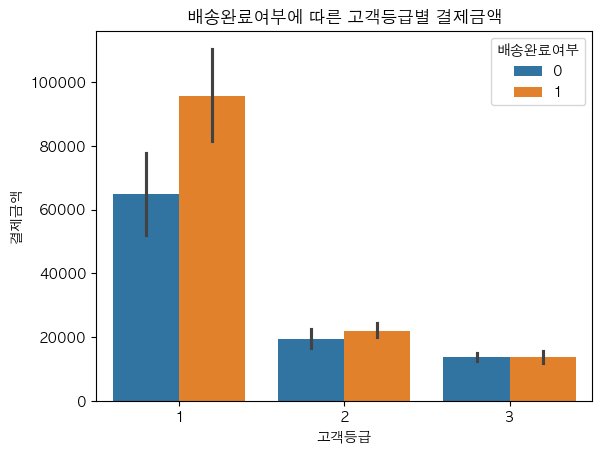

In [7]:
sns.barplot(x='고객등급', y='결제금액', hue='배송완료여부',data=df)
plt.title('배송완료여부에 따른 고객등급별 결제금액')
plt.show()